# Pandas, seaborn, обучение модели, метрики качества

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [237]:
# маскимальное кол-во отображаемых столбцов
pd.set_option('display.max_columns', 13)
# маскимальное кол-во отображаемых строк
pd.set_option('display.max_rows', 10)
# максимальная ширина столбца
pd.set_option('display.max_colwidth', 45)
# максимальная ширина отображения
pd.set_option('display.width', 80)

In [166]:
data = pd.read_csv('titanic.csv', index_col='passenger_id')

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, 100 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  791 non-null    int64  
 1   pclass    791 non-null    int64  
 2   name      791 non-null    object 
 3   gender    791 non-null    object 
 4   age       636 non-null    float64
 5   sibsp     791 non-null    int64  
 6   parch     791 non-null    int64  
 7   ticket    791 non-null    object 
 8   fare      791 non-null    float64
 9   cabin     184 non-null    object 
 10  embarked  790 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 74.2+ KB


In [168]:
# pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);
# name — имя;
# gender — пол;
# age — возраст;
# sibsp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;
# parch — количество родителей, детей (в том числе приемных) на борту титаника;
# ticket — номер билета;
# fare — плата за проезд;
# cabin — каюта;
# embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

In [169]:
data.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passenger_id,,,,,,,,,,,
100,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
101,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
102,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
103,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
104,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S


In [170]:
data.head(10)

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passenger_id,,,,,,,,,,,
100,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
101,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
102,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
103,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
104,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
105,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
106,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
107,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
108,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S


In [171]:
data.tail()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passenger_id,,,,,,,,,,,
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [172]:
data.sample(n=5) #random

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passenger_id,,,,,,,,,,,
732,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S
218,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
746,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
388,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
843,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C


In [173]:
data.shape

(791, 11)

In [174]:
data.columns

Index(['survived', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

### Выборки из таблицы

In [175]:
data.loc[:, 'name']

passenger_id
100                     Petranec, Miss. Matilda
101            Petroff, Mr. Pastcho ("Pentcho")
102                   White, Mr. Richard Frasar
103                  Johansson, Mr. Gustaf Joel
104              Gustafsson, Mr. Anders Vilhelm
                         ...                   
886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: name, Length: 791, dtype: object

In [176]:
data.loc[:, ['name', 'gender']]

,name,gender
passenger_id,,
100,"Petranec, Miss. Matilda",female
101,"Petroff, Mr. Pastcho (""Pentcho"")",male
102,"White, Mr. Richard Frasar",male
103,"Johansson, Mr. Gustaf Joel",male
104,"Gustafsson, Mr. Anders Vilhelm",male
...,...,...
886,"Montvila, Rev. Juozas",male
887,"Graham, Miss. Margaret Edith",female
888,"Johnston, Miss. Catherine Helen ""Carrie""",female


In [177]:
data.loc[708, 'name']

'Cleaver, Miss. Alice'

In [178]:
data.loc[100]

survived                          0
pclass                            3
name        Petranec, Miss. Matilda
gender                       female
age                            28.0
                     ...           
parch                             0
ticket                       349245
fare                         7.8958
cabin                           NaN
embarked                          S
Name: 100, Length: 11, dtype: object

In [179]:
data.loc[102:105]

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passenger_id,,,,,,,,,,,
102,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
103,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
104,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
105,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S


In [180]:
data[data['gender'] == 'male']
#короткая запись того же loc 

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passenger_id,,,,,,,,,,,
101,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
102,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
103,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
104,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
105,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [181]:
data[(data['gender'] == 'male') & (data['pclass'] == 3)]

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passenger_id,,,,,,,,,,,
101,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
103,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
104,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
105,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
107,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
877,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
881,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S


In [182]:
data[data['gender'] == 'male']['age']

passenger_id
101     NaN
102    21.0
103    33.0
104    37.0
105    28.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: age, Length: 516, dtype: float64

### Функции таблицы

In [183]:
data['survived'].mean() #среднее

np.float64(0.3805309734513274)

In [184]:
data['survived'].value_counts()
# print(data[data['survived'] == 1].size)

survived
0    490
1    301
Name: count, dtype: int64

In [185]:
(data['gender'] == 'female').mean()

np.float64(0.347661188369153)

In [186]:
data[data['gender'] == 'female']['survived'].mean()

np.float64(0.7345454545454545)

In [187]:
data[data['gender'] == 'male']['survived'].mean()

np.float64(0.19186046511627908)

In [188]:
data[data['gender'] == 'female']['survived'].sum()

np.int64(202)

In [189]:
data[data['gender'] == 'female']['survived'].count()
#число заполненных строк!

np.int64(275)

In [190]:
data[data['gender'] == 'female']['survived'].shape

(275,)

In [191]:
data['age'].min()

np.float64(0.42)

In [192]:
data['age'].max()

np.float64(80.0)

In [193]:
data['age'].median()

np.float64(28.75)

In [194]:
data['age'].mean()

np.float64(29.97301886792453)

### Пропуски данных

In [195]:
data.isnull().sum()

survived      0
pclass        0
name          0
gender        0
age         155
           ... 
parch         0
ticket        0
fare          0
cabin       607
embarked      1
Length: 11, dtype: int64

In [196]:
data.isnull().mean().sort_values(ascending=False)

cabin       0.767383
age         0.195954
embarked    0.001264
survived    0.000000
pclass      0.000000
              ...   
gender      0.000000
sibsp       0.000000
parch       0.000000
ticket      0.000000
fare        0.000000
Length: 11, dtype: float64

In [197]:
data.dropna()
#у этой функции есть inplace
# удаление всех строк, где есть хотя бы одно пропущенное значение

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passenger_id,,,,,,,,,,,
102,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
110,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
118,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
123,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
124,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Mo...",female,47.0,1,1,11751,52.5542,D35,S
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wil...",female,56.0,0,1,11767,83.1583,C50,C


In [198]:
data.dropna(subset=['cabin', 'age', 'embarked'])
#пропуски будут искаться только в этих столбцах

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passenger_id,,,,,,,,,,,
102,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
110,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
118,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
123,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
124,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Mo...",female,47.0,1,1,11751,52.5542,D35,S
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wil...",female,56.0,0,1,11767,83.1583,C50,C


In [199]:
data['age'].fillna(value=-999)

passenger_id
100     28.0
101   -999.0
102     21.0
103     33.0
104     37.0
       ...  
886     27.0
887     19.0
888   -999.0
889     26.0
890     32.0
Name: age, Length: 791, dtype: float64

In [200]:
data['age'].fillna(value=0)

passenger_id
100    28.0
101     0.0
102    21.0
103    33.0
104    37.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: age, Length: 791, dtype: float64

In [201]:
data['age'].fillna(value=data['age'].mean())

passenger_id
100    28.000000
101    29.973019
102    21.000000
103    33.000000
104    37.000000
         ...    
886    27.000000
887    19.000000
888    29.973019
889    26.000000
890    32.000000
Name: age, Length: 791, dtype: float64

In [202]:
data.isnull().mean().sort_values(ascending=False)

cabin       0.767383
age         0.195954
embarked    0.001264
survived    0.000000
pclass      0.000000
              ...   
gender      0.000000
sibsp       0.000000
parch       0.000000
ticket      0.000000
fare        0.000000
Length: 11, dtype: float64

In [203]:
data.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passenger_id,,,,,,,,,,,
100,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
101,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
102,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
103,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
104,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S


### Дубликаты данных

In [204]:
data.duplicated().sum()

np.int64(0)

In [205]:
data.drop_duplicates(inplace=True)

### Apply

In [206]:
def age_group(age):
    if age < 18:
        return 0
    if age < 35:
        return 1
    else:
        return 2

In [207]:
data['age_group'] = data['age'].apply(age_group)
#можно передавать сразу две колонки, например data[['col1', 'col2']].apply(func, axis=1)

In [208]:
data.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_group
passenger_id,,,,,,,,,,,,
100,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S,1
101,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,2
102,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S,1
103,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S,1
104,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S,2


In [209]:
data.drop(['age_group'], 1, inplace = True)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [210]:
data['embarked'] = data['embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

In [211]:
data.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_group
passenger_id,,,,,,,,,,,,
100,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,Southampton,1
101,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,Southampton,2
102,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,Southampton,1
103,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,Southampton,1
104,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,Southampton,2


### Группировки

In [212]:
data.groupby('gender').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [213]:
data.groupby('gender')['survived'].mean()

gender
female    0.734545
male      0.191860
Name: survived, dtype: float64

In [214]:
splits = data.groupby('gender')
splits

In [215]:
splits.get_group('female')  # тот же результат, что и data.loc[data['gender'] == 'female']

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_group
passenger_id,,,,,,,,,,,,
100,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,Southampton,1
106,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,Southampton,1
109,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Queenstown,2
111,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,Cherbourg,0
113,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,Southampton,1
882,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,Southampton,1
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Queenstown,2


In [216]:
splits.count()

,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,age_group
gender,,,,,,,,,,,
female,275,275,275,228,275,275,275,275,88,274,275
male,516,516,516,408,516,516,516,516,96,516,516


In [217]:
splits.mean()

TypeError: agg function failed [how->mean,dtype->object]

In [218]:
splits['survived'].mean()

gender
female    0.734545
male      0.191860
Name: survived, dtype: float64

In [219]:
splits.first()

,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,age_group
gender,,,,,,,,,,,
female,0,3,"Petranec, Miss. Matilda",28.0,0,0,349245,7.8958,E101,Southampton,1
male,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",21.0,0,0,349215,7.8958,D26,Southampton,2


In [220]:
splits['survived'].agg(['mean', 'std', 'count'])

,mean,std,count
gender,,,
female,0.734545,0.442380,275
male,0.191860,0.394146,516


### Seaborn

In [221]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

In [222]:
pal = dict(male="#6495ED", female="#F08080")

In [223]:
data['gender'].value_counts()

gender
male      516
female    275
Name: count, dtype: int64

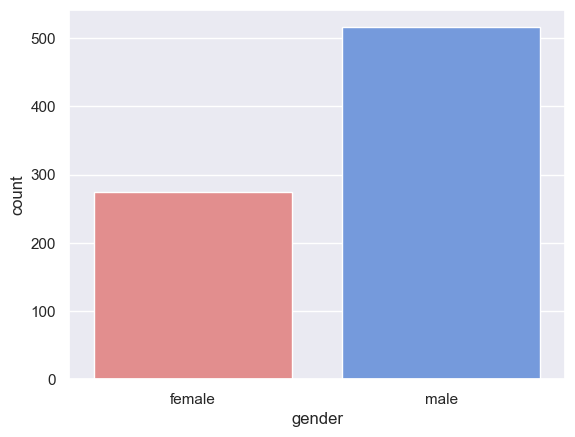

In [224]:
plot = sns.countplot(x='gender', data=data, palette=pal)
plot.figure.savefig('1.png')

In [225]:
pd.crosstab(data['gender'], data['pclass'])

pclass,1,2,3
gender,,,
female,87,66,122
male,108,100,308


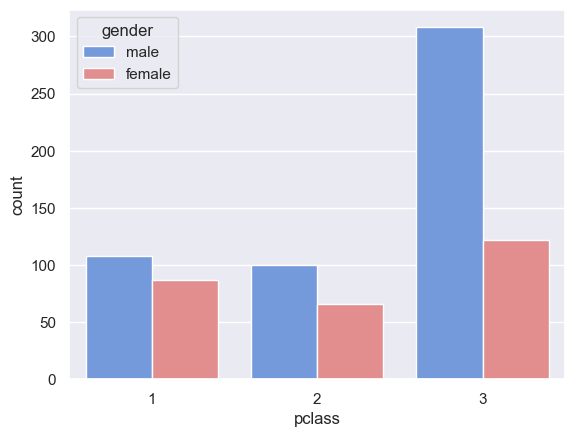

In [226]:
sns.countplot(x='pclass', data=data, hue='gender', palette=pal);

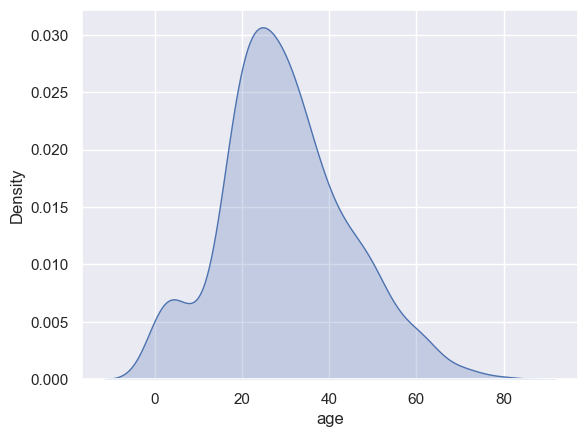

In [227]:
sns.kdeplot(data['age'], shade=True);

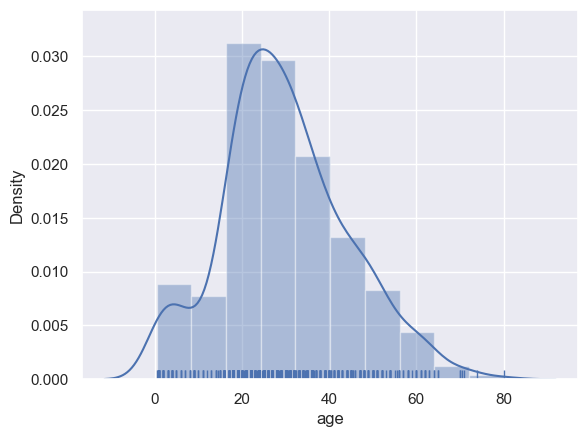

In [228]:
sns.distplot(data['age'], bins=10, rug=True);

### Обработка категориальных признаков

In [238]:
for col in data:
    if data[col].dtype == 'object':
        print(col, len(list(data[col].unique())))

name 791
ticket 619
cabin 138
embarked 4


In [239]:
data['gender'].unique()

array([1, 0])

In [240]:
data['embarked'].unique()

array(['Southampton', 'Queenstown', 'Cherbourg', nan], dtype=object)

In [241]:
data.drop(['name', 'ticket'], 1, inplace=True)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [242]:
data['gender'] = data['gender'].map({'male': 0, 'female': 1})

In [243]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['embarked'])
s = le.transform(data['embarked']);

In [246]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(s)
cat_lb = lb.transform(s)
cat_lb

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]], shape=(791, 4))

In [247]:
a = pd.DataFrame(cat_lb, index=data.index)
a.rename(columns={0: 'From_Cherbourg', 1: 'From_Queenstown', 2: 'From_Southampton'}, inplace=True)

In [248]:
data = pd.concat([data, a], axis=1)

In [249]:
data.drop(['embarked'], 1, inplace=True)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [250]:
data.head()

,survived,pclass,name,gender,age,sibsp,...,embarked,age_group,From_Cherbourg,From_Queenstown,From_Southampton,3
passenger_id,,,,,,,,,,,,,
100,0,3,"Petranec, Miss. Matilda",NaN,28.0,0,...,Southampton,1,0,0,1,0
101,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",NaN,NaN,0,...,Southampton,2,0,0,1,0
102,0,1,"White, Mr. Richard Frasar",NaN,21.0,0,...,Southampton,1,0,0,1,0
103,0,3,"Johansson, Mr. Gustaf Joel",NaN,33.0,0,...,Southampton,1,0,0,1,0
104,0,3,"Gustafsson, Mr. Anders Vilhelm",NaN,37.0,2,...,Southampton,2,0,0,1,0


### Корреляция

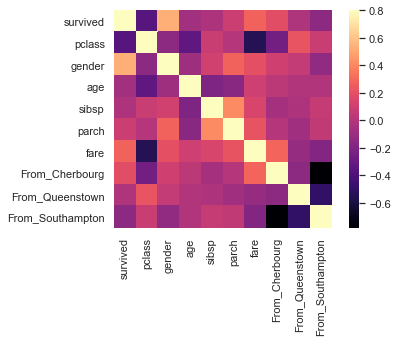

In [80]:
corr = data.corr()
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

In [81]:
data.drop(['fare', 'From_Cherbourg'], 1, inplace=True)

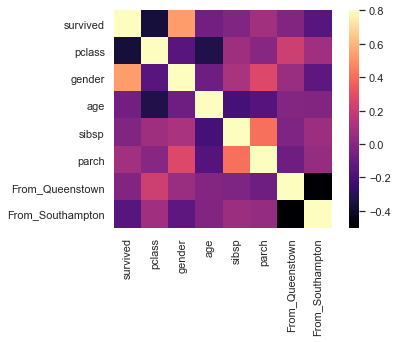

In [82]:
corr = data.corr()
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

### Обучение модели

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [84]:
X = data.loc[:, data.columns != 'survived']
y = data.loc[:, data.columns == 'survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
forest = RandomForestClassifier(n_estimators = 50, max_depth = 3)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

### Метрики качества

In [86]:
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy test: ", accuracy_score(y_pred, y_test))
print("f1 test: ", f1_score(y_pred, y_test))

Accuracy test:  0.7647058823529411
f1 test:  0.631578947368421


In [87]:
y_pred_train = forest.predict(X_train)

print("Accuracy train: ", accuracy_score(y_pred_train, y_train))
print("f1 train: ", f1_score(y_pred_train, y_train))

Accuracy train:  0.8300180831826401
f1 train:  0.7025316455696201


In [88]:
y_pred_proba_train = forest.predict_proba(X_train)
y_pred_proba_test = forest.predict_proba(X_test)

In [89]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_proba_train[:, 1])
roc_auc = auc(fpr, tpr)
print("auc train: ", roc_auc)

auc train:  0.877927774465548


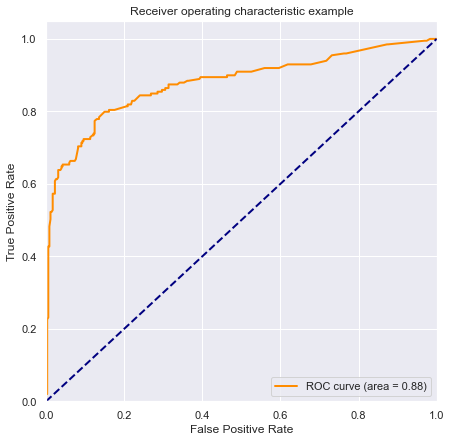

In [90]:
plt.figure(figsize = (7,7))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [91]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_test[:, 1])
roc_auc = auc(fpr, tpr)
print("auc test: ", roc_auc)

auc test:  0.8407583621683967


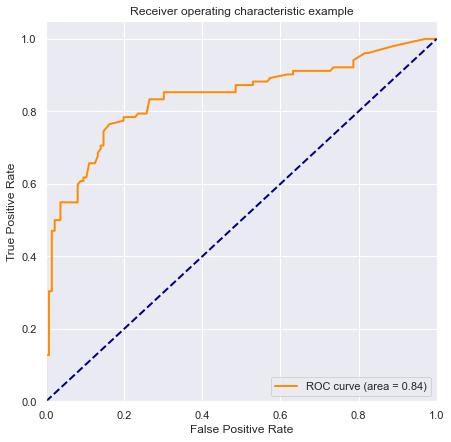

In [92]:
plt.figure(figsize = (7,7))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Feature ranking:
1. pclass (0.377847)
2. gender (0.317338)
3. age (0.124779)
4. sibsp (0.094595)
5. parch (0.048629)
6. From_Southampton (0.029693)
7. From_Queenstown (0.007119)


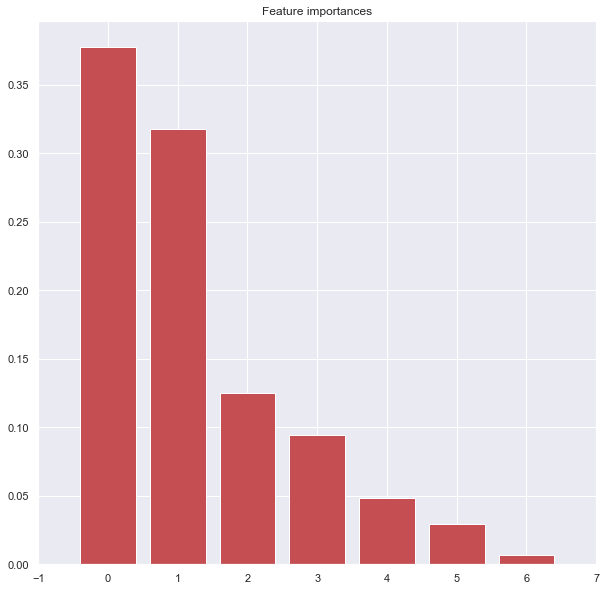

In [93]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
    
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")

plt.xlim([-1, X.shape[1]])
plt.show()